<a href="https://colab.research.google.com/github/JACKARPANJACK/AI-Lab-6th-sem/blob/main/DFS_MAZE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib numpy

Generated Maze:


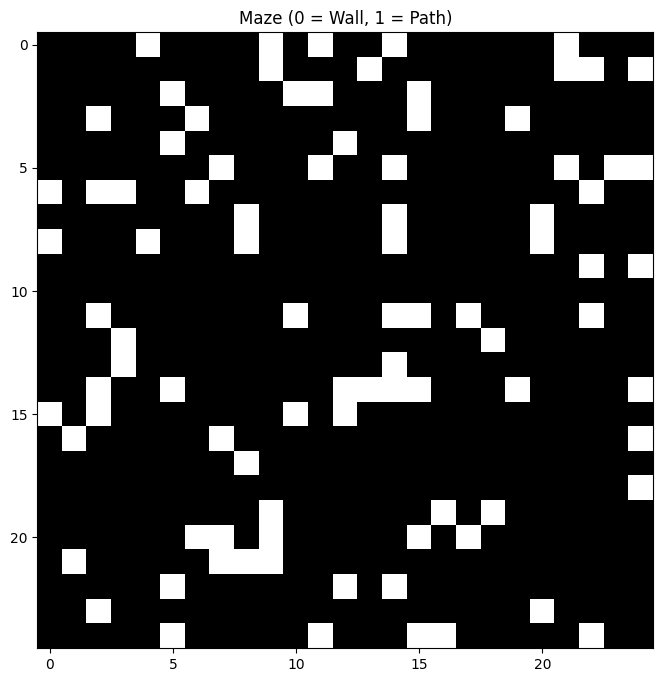

Running DFS...
Path found! Showing result...


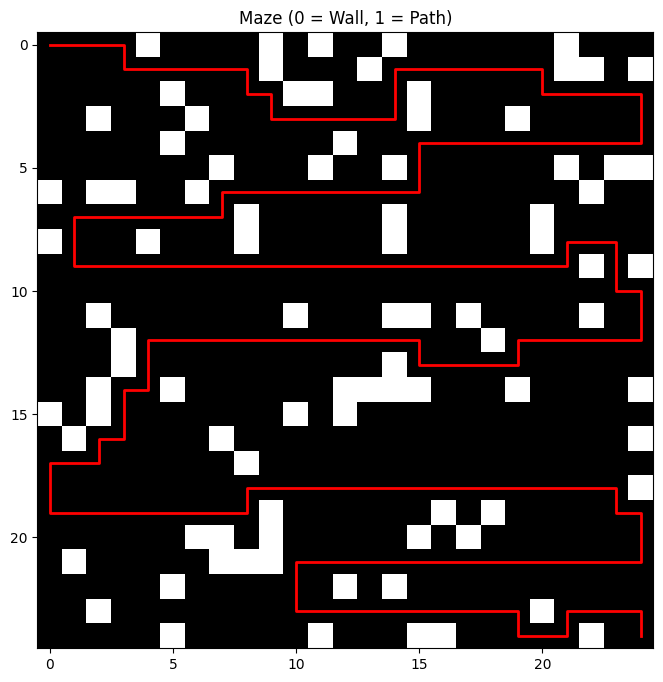

In [ ]:
#DFS Solver and Maze Generator
import random
import matplotlib.pyplot as plt
import numpy as np

def generate_maze(rows, cols, density=0.25):
    maze = np.ones((rows, cols), dtype=int)

    for r in range(rows):
        for c in range(cols):
            if random.random() < density:
                maze[r][c] = 0  # wall

    # Force start and end open
    maze[0][0] = 1
    maze[rows-1][cols-1] = 1

    return maze

def dfs(maze, start, goal):
    rows, cols = maze.shape
    stack = [start]
    visited = set([start])
    parent = {start: None}

    moves = [(1,0), (-1,0), (0,1), (0,-1)]  # Up/Down/Left/Right

    while stack:
        r, c = stack.pop()

        # Goal reached
        if (r, c) == goal:
            path = []
            cur = goal
            while cur:
                path.append(cur)
                cur = parent[cur]
            return path[::-1]  # reversed

        # Explore neighbors
        for dr, dc in moves:
            nr, nc = r + dr, c + dc

            if 0 <= nr < rows and 0 <= nc < cols:
                if maze[nr][nc] == 1 and (nr, nc) not in visited:
                    visited.add((nr, nc))
                    parent[(nr, nc)] = (r, c)
                    stack.append((nr, nc))

    return None  # No path found

def plot_maze(maze, path=None):
    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap='gray_r')  # 1 = white, 0 = black
    plt.title("Maze (0 = Wall, 1 = Path)")

    if path:
        pr, pc = zip(*path)
        plt.plot(pc, pr, color='red', linewidth=2)  # DFS path

    plt.show()

rows, cols = 25, 25
maze = generate_maze(rows, cols, density=0.15)

start = (0, 0)
goal = (rows - 1, cols - 1)

print("Generated Maze:")
plot_maze(maze)

print("Running DFS...")
path = dfs(maze, start, goal)

if path:
    print("Path found! Showing result...")
    plot_maze(maze, path)
else:
    print("No path existed. Try lowering wall density.")

